numpy roll - shifts array elements 
roll(list, #index shift)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

my_list = [0,1,2,3,4,5,6,7,8,9]
print(my_list)
print(np.roll(my_list, 1))
print(np.roll(my_list, -1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9 0 1 2 3 4 5 6 7 8]
[1 2 3 4 5 6 7 8 9 0]


In [11]:
import numpy as np

def f(x): 
    return (1.0-np.cos(x))/x**2.0

def fpp(x):
    return (6.0 - 4.0*x*np.sin(x)+(x**2.0-6.0)*np.cos(x))/x**4

print(fpp(1))

-0.0673954685722844


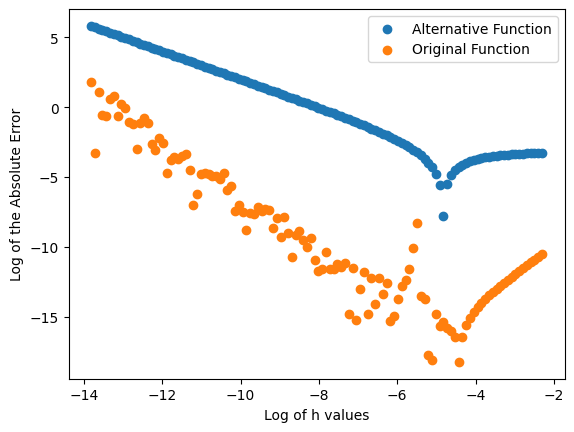

In [63]:
#Worked Example: Problem 3.8
import numpy as np
import matplotlib.pyplot as plt

x = 0.004
hs = np.logspace(-1, -6, 120)
def f_func(x):
    return (1 - np.cos(x))/(x**2)

def fpp(x):
    return (6.0 - 4.0*x*np.sin(x)+(x**2.0-6.0)*np.cos(x))/x**4

def calc_cdiff(f_func,x,h):
    cd = (f_func(x+h/2) - f_func(x-h/2))/h
    return cd

def calc_sec_cdiff(f_func, x,h):
    scd = (f_func(x-h) - 2.0*f_func(x) + f_func(x + h))/(h**2)
    return scd

an = fpp(x)

def alt_f_func(x):
    return (2*(np.sin(x/2))**2)/(x**2)
def cd_altf(alt_f_func, x, h):
    ascd = (alt_f_func(x) - 2.0*alt_f_func(x) + alt_f_func(x+h))/(h**2)
    return ascd

ascds = [abs(cd_altf(alt_f_func,x,h) - an) for h in hs]
scds = [abs(calc_sec_cdiff(f_func,x,h) - an) for h in hs]

plt.scatter(np.log(hs), np.log(ascds), label = "Alternative Function")
plt.scatter(np.log(hs), np.log(scds), label = "Original Function")
plt.ylabel("Log of the Absolute Error")
plt.xlabel("Log of h values")
plt.legend()


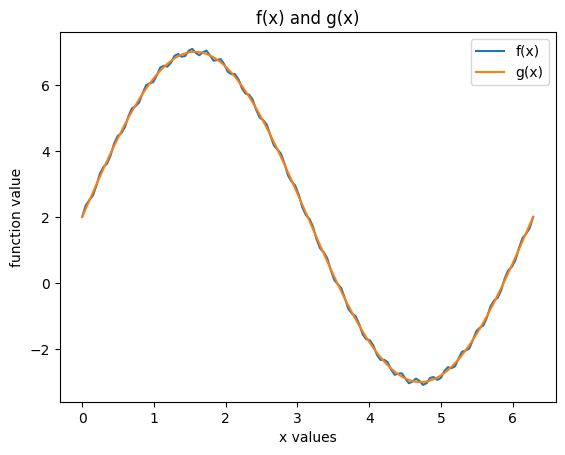

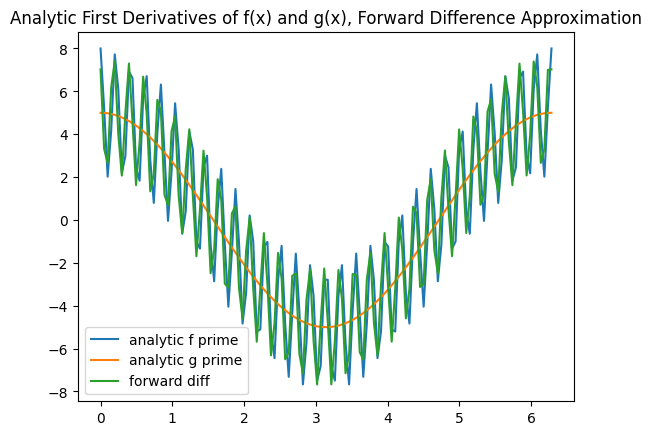

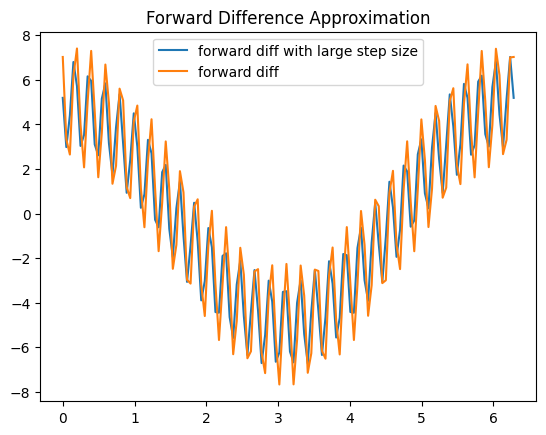

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 128) 
h = 2*np.pi/128

def f(x): #function with noise
    return 2 + 5*np.sin(x) + 0.1*np.sin(30*x)
def g(x): #function without noise
    return 2 + 5*np.sin(x)

plt.plot(x, f(x), label = "f(x)")
plt.plot(x, g(x), label = "g(x)")
plt.title("f(x) and g(x)")
plt.ylabel("function value")
plt.xlabel("x values")
plt.legend()
plt.show()

def anal_fp(x): #analytic f'(x)
    return 5*np.cos(x) + 0.1*30*np.cos(30*x)
def anal_gp(x): #analytic g'(x)
    return 5*np.cos(x)
def for_fp(f,x,h):#forward difference
    fd = (f(x+h) - f(x))/h
    return fd

plt.plot(x, anal_fp(x), label = "analytic f prime")
plt.plot(x, anal_gp(x), label = "analytic g prime")
plt.plot(x, for_fp(f,x,h), label = "forward diff")
plt.legend()
plt.title("Analytic First Derivatives of f(x) and g(x), Forward Difference Approximation")
plt.show()

def alt_for_fp(f,x,h): #forward diffence but with bigger step size
    fd = (f(x+2*h) - f(x))/(2*h)
    return fd

plt.plot(x, alt_for_fp(f,x,h), label = "forward diff with large step size")
plt.plot(x, for_fp(f,x,h), label = "forward diff")
plt.legend()
plt.title("Forward Difference Approximation")
plt.show()